In [43]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

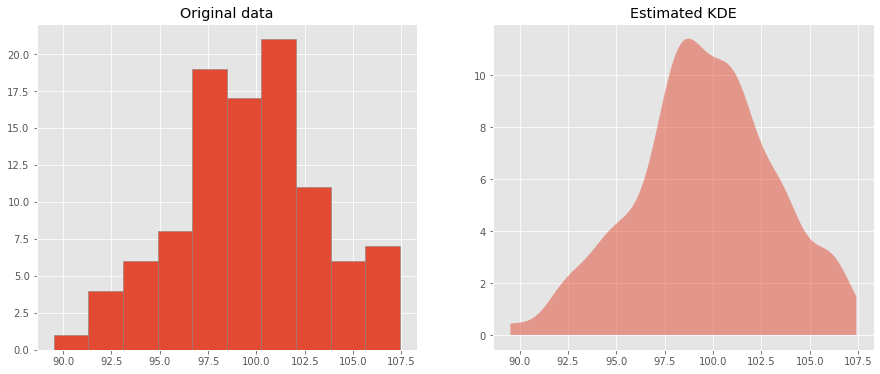

In [56]:
def kde(X):
    min_x = X.min()
    max_x = X.max()
    num_obs = X.shape[0]
    X_axis = np.linspace(min_x, max_x, num_obs)
    gaussian_result = sum([norm(x).pdf(X_axis) for x in X])
    return X_axis, gaussian_result

rng = np.random.RandomState(42)
X = rng.normal(100, 4, size=100)
X_axis, gaussian_result = kde(X)

fig, axes = plt.subplots(1, 2, figsize=[15,6])
axes[0].hist(X, edgecolor='grey')
axes[0].set_title('Original data')
axes[1].fill_between(X_axis, gaussian_result, alpha=0.5)
axes[1].set_title('Estimated KDE');

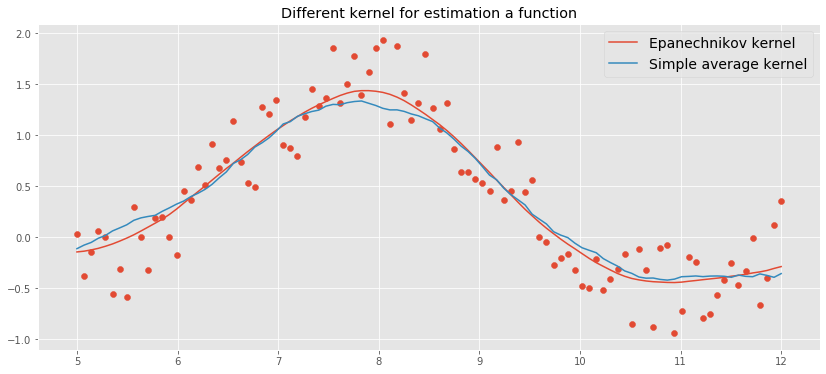

In [104]:
def average_kernel(X, Y, data):
    sigma = 1
    ind = (np.abs(X - data) < 1)
    return Y[ind].mean()

def epanechnicov(X, Y, data):
    sigma = 1
    kernels = []
    for i in range(X.shape[0]):
        D = np.abs(X[i] - data) / sigma
        if D > 1:
            kernels.append(0)
        else:
            kernels.append((3/4) * (1 - D**2))
    return kernels

def smooth_kernel(X, Y, data):
    kernels = epanechnicov(X, Y, data)
    estimates = []
    for i in range(Y.shape[0]):
        estimates.append(Y[i] * kernels[i])
    result = np.sum(estimates) / np.sum(kernels)
    return result

smooth_results = [smooth_kernel(X, Y, d) for d in X]
avg_results = [average_kernel(X, Y, d) for d in X]
fig, ax = plt.subplots(figsize=[14,6])
ax.plot(X, smooth_results, label='Epanechnikov kernel')
ax.plot(X, avg_results, label='Simple average kernel')
ax.legend(fontsize=14)
ax.scatter(X, Y)
ax.set_title('Different kernel for estimation a function');